Code for project: Extragalactic Confusion Foreground
==

Step 1. Catagorization for Potential Gravitational Sources(GWGC); \
Step 2. Compute GW power spectrum for baseline galaxies; \
Step 3. Compute extragalactic GW confusion foreground.

This code contains step 1.

Contact: weitianyu@u.northwestern.edu

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy import units as u
from astropy.table import Table, join, vstack
from astropy.io import ascii
import GW_calcs
import MW_maker

Source data: \
Gravitational Wave Galaxy Catalog (White et al. 2011) \
https://ui.adsabs.harvard.edu/abs/2011CQGra..28h5016W/abstract

  PGC               Name               RAhour   DEdeg   ... e_Dist e_Bmag e_BMAG
                                         h       deg    ...  Mpc    mag    mag  
------- ---------------------------- --------- -------- ... ------ ------ ------
      2 UGC12889                       0.00047  47.2745 ...  10.87   0.61   0.61
      4 PGC000004                      0.00096  23.0876 ...  13.92   0.39   0.40
      6 PGC000006                      0.00058  15.8817 ...  18.52   0.34   0.35
      7 PGC000007                      0.00122  -0.0833 ...  21.42   0.33   0.34
     10 PGC000010                      0.00217  -0.0406 ...  21.61   0.29   0.31
     12 PGC000012                      0.00240  -6.3739 ...  13.82   0.36   0.37
     13 PGC000013                      0.00370  33.1342 ...  10.91   0.40   0.41
     16 PGC000016                      0.00314  -5.1587 ...  11.89   0.29   0.30
     18 PGC000018                      0.00360  46.9651 ...  11.60   0.31   0.32
     31 PGC000031           

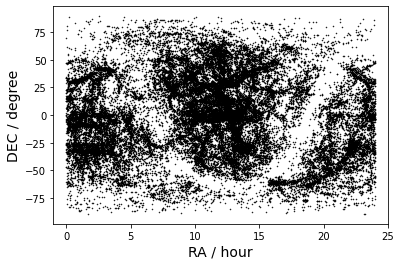

In [4]:
# ==============
# Read GWGC Data
# ==============

data_path = './DATA/'
data_save_path = './generated_data/'

# Import GWGC Data
GWGC = fits.open(data_path + 'VII_267_gwgc.dat.gz.fits')
GWGC = Table.read(data_path + 'VII_267_gwgc.dat.gz.fits')

# Select data with non-zero Bmag
mask = GWGC['Bmag'] != 0
GWGC = GWGC[mask]
print(GWGC)

# Adding two columns for M-to-L and Estimated Mass
GWGC['M_to_L'] = np.zeros(len(GWGC)) - 1
GWGC['EST_M'] = np.zeros(len(GWGC)) - 1

# Galaxy sky locations
plt.plot(GWGC['RAhour'], GWGC['DEdeg'], 'k.', markersize = 1)
plt.xlim(-1, 25)
plt.xlabel('RA / hour', fontsize=14)
plt.ylabel('DEC / degree', fontsize=14)
plt.show()

In [5]:
# ==============================
# Estimating Galaxy Stellar Mass
# ==============================
'''
Applying mass-to-light ratio condtions to the catalog data from 
Faber and Gallagher (1979).
'''

# Catagorization of galaxies
# Devide GWGC catalog to 7 groups of galaxy following Faber (1979)

GWGC_mk = GWGC[np.where(GWGC['TT'] == -9.)] # Milky-Way
GWGC_1 = GWGC[np.where((GWGC['TT'] >= -6.) & (GWGC['TT'] < -4.))]
GWGC_2 = GWGC[np.where((GWGC['TT'] >= -4.) & (GWGC['TT'] < -2.))]
GWGC_3 = GWGC[np.where((GWGC['TT'] >= -2.) & (GWGC['TT'] < 1.))]
GWGC_4 = GWGC[np.where((GWGC['TT'] >= 1.)  & (GWGC['TT'] < 4.))]
GWGC_5 = GWGC[np.where((GWGC['TT'] >= 4.)  & (GWGC['TT'] < 5.))]
GWGC_6 = GWGC[np.where((GWGC['TT'] >= 5.)  & (GWGC['TT'] < 8.))]
GWGC_7 = GWGC[np.where((GWGC['TT'] >= 8.)  & (GWGC['TT'] < 10))]

print('Number of galaxies in the catalog:', len(GWGC))
print('Number of members in each group:',
      len(GWGC_mk), len(GWGC_1), len(GWGC_2), len(GWGC_3), 
      len(GWGC_4),  len(GWGC_5), len(GWGC_6), len(GWGC_7))

# Assign Mass-to-light ratio to the catalog
'''
Blue luminosity in the unit of 10^10 solar luminosity
Mass-to-light ratio in the standard system - m_solar / L_solar
Estimated mass in the unit of m_solar
'''
GWGC_1['M_to_L'] = 8.5
GWGC_2['M_to_L'] = 9.5
GWGC_3['M_to_L'] = 6.2
GWGC_4['M_to_L'] = 6.5
GWGC_5['M_to_L'] = 4.7
GWGC_6['M_to_L'] = 3.9
GWGC_7['M_to_L'] = 1.7

# Assign group number
GWGC_1['TYPE'] = 1
GWGC_2['TYPE'] = 2
GWGC_3['TYPE'] = 3
GWGC_4['TYPE'] = 4
GWGC_5['TYPE'] = 5
GWGC_6['TYPE'] = 6
GWGC_7['TYPE'] = 7

GWGC_with_mass = vstack([GWGC_1, GWGC_2, GWGC_3, GWGC_4, GWGC_5, GWGC_6, GWGC_7])
GWGC_with_mass['EST_M'] = (abs(GWGC_with_mass['Bmag'] * 
                               GWGC_with_mass['M_to_L']) * 1e10 *u.solMass)

# Galaxy Stellar Mass
# The ratio of galaxy stellar mass and total mass STR
STR = 6.43/129
GWGC_with_mass['EST_STELLAR_M'] = GWGC_with_mass['EST_M'] * STR

Number of galaxies in the catalog: 49300
Number of members in each group: 116 1415 1614 28963 5529 2285 6145 2446


range of Stellar Mass = 245735659 - 87649872093


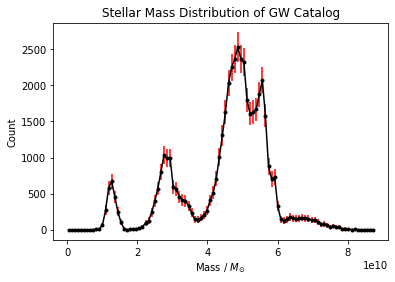

In [6]:
# =============================
# Galaxy Catalog Characteristic
# =============================

# Mass distribution
print('range of Stellar Mass =', 
      format(min(GWGC_with_mass['EST_STELLAR_M']), '.0f'), '-', 
      format(max(GWGC_with_mass['EST_STELLAR_M']), '.0f'))

bins = 100
N, mass = np.histogram(GWGC_with_mass['EST_STELLAR_M'], bins, 
                       range = (0, max(GWGC_with_mass['EST_STELLAR_M'])))
mass_mid = (mass[1:] + mass[:-1]) / 2

plt.errorbar(mass_mid, N, yerr = 4*np.sqrt(N), fmt = 'k.', linestyle = '-', ecolor = 'r')
plt.xlabel('Mass / $M_{\odot}$')
plt.ylabel('Count')
plt.title('Stellar Mass Distribution of GW Catalog')
plt.savefig('figures/'+'Stellar_Mass_Distribution.png')
plt.show()

In [7]:
# ===========================
# Estimate Galaxy Metallicity
# ===========================

# Estimate Galaxy Metallicity from Tremonti 2004 MZ Relation
Z_log12 = (-1.492 + 1.847*np.log10(GWGC_with_mass['EST_STELLAR_M']) 
          - 0.0826*np.log10(GWGC_with_mass['EST_STELLAR_M'])**2) 

# Converge 12+log(O/H) form to primordial metallicity
Z = 33.8286 * 10**(Z_log12 - 12) 
GWGC_COMPLETE = GWGC_with_mass # Final table for GWGC analysis

# Change galaxy mass to 10_12 solar mass
GWGC_COMPLETE['EST_STELLAR_M'] = np.round(GWGC_with_mass['EST_STELLAR_M'], decimals = 4)
GWGC_COMPLETE['EST_Z'] = np.round(Z, decimals = 4)

# Construct table for further use
# Take useful information from GWGC
GWGC_COMPLETE = GWGC_COMPLETE['PGC', 'Name', 'RAhour', 'DEdeg', 'TT', 'Bmag', 
                              'Dist', 'EST_STELLAR_M','EST_Z', 'TYPE']

ascii.write(GWGC_COMPLETE, data_save_path+'GWGC_COMPLETE.csv', 
            format='basic', fast_writer=False)

Range of Metallicity =  0.0052 0.0228


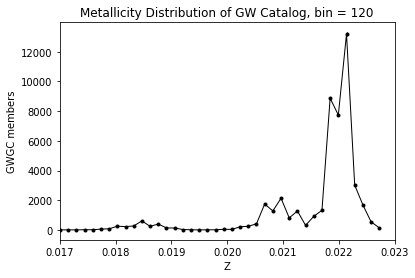

In [8]:
# ========================
# Metallicity Distribution
# ========================
bins = 120
min_Z = min(GWGC_COMPLETE['EST_Z'])
max_Z = max(GWGC_COMPLETE['EST_Z'])

N, Z = np.histogram(GWGC_COMPLETE['EST_Z'], bins, range = (min_Z, max_Z))
Z_mid = (Z[1:] + Z[:-1])/2
plt.errorbar(Z_mid, N, yerr = np.sqrt(N), fmt = 'k.', 
             linestyle = '-', linewidth = 1, ecolor = 'k')
print('Range of Metallicity = ', min_Z, max_Z)

plt.xlim(0.017, 0.023)
plt.xlabel('Z')
plt.ylabel('GWGC members')
plt.title('Metallicity Distribution of GW Catalog, bin = 120')
plt.show()

Members of complete catalog: 
 48397 Z = 0.0217 std = 0.0009 

Members of group 1 : 1415 Z = 0.0224 std = 0.0002
Members of group 2 : 1614 Z = 0.0225 std = 0.0001
Members of group 3 : 28963 Z = 0.0221 std = 0.0002
Members of group 4 : 5529 Z = 0.0219 std = 0.0002
Members of group 5 : 2285 Z = 0.0212 std = 0.0002
Members of group 6 : 6145 Z = 0.0208 std = 0.0002
Members of group 7 : 2446 Z = 0.0184 std = 0.0005


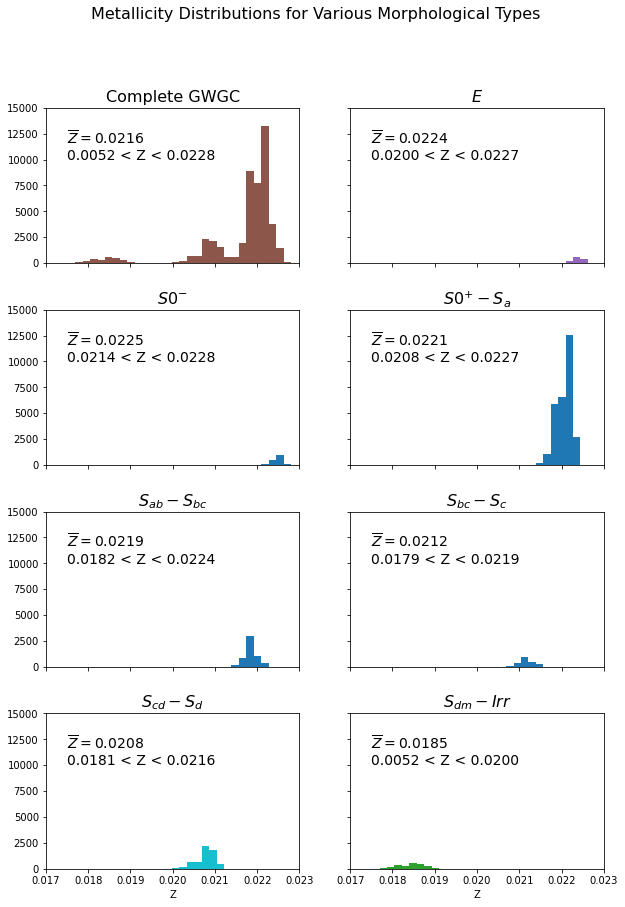

In [9]:
# ================================================
# Metallicity Distribution for 7 types of galaxies
# and catagorization
# ================================================

groups = [[], [], [], [], [], [], []]
for i in range(len(groups)):
    groups[i] = GWGC_COMPLETE[np.where(GWGC_COMPLETE['TYPE'] == i+1)]

# Print parameters of each group
print('Members of complete catalog:', '\n',
      len(GWGC_COMPLETE), 'Z =', round(np.mean(GWGC_COMPLETE['EST_Z']), 4), 
      'std =', round(np.std(GWGC_COMPLETE['EST_Z']), 4), '\n')

for j in range(len(groups)):
    print('Members of group', j+1, ':',
          len(groups[j]), 'Z =', round(np.mean(groups[j]['EST_Z']), 4), 
          'std =', round(np.std(groups[j]['EST_Z']), 4))
    
# Plot Metallicity distribution for each group
fig, ((ax1, ax2), 
      (ax3, ax4), 
      (ax5, ax6), 
      (ax7, ax8)) = plt.subplots(4, 2, sharey = False, 
                                 gridspec_kw={'hspace': 0.3, 'wspace': 0.2}, 
                                 figsize = (10, 14))
fig.suptitle('Metallicity Distributions for Various Morphological Types', fontsize = 16)
bins = 100

# Complete distribution of metallicity
ax1.hist(GWGC_COMPLETE['EST_Z'], bins, range = (min_Z, max_Z), color='tab:brown')
ax1.set_title('Complete GWGC', fontsize=16)
ax1.text(0.0175, 11500, r'$\overline{Z} = 0.0216$', fontsize=14)
ax1.text(0.0175, 10000, r'0.0052 < Z < 0.0228', fontsize=14)

# 1st type of galaxy
groups[0]['GROUP'] = 1 # Assign group number
ax2.hist(groups[0]['EST_Z'], bins, range = (min_Z, max_Z), color='tab:purple')
ax2.set_title('$E$', fontsize=16)
ax2.text(0.0175, 11500, r'$\overline{Z} = 0.0224$', fontsize=14)
ax2.text(0.0175, 10000, r'0.0200 < Z < 0.0227', fontsize=14)

# 2nd type of galaxy
groups[1]['GROUP'] = 2 # Assign group number
ax3.hist(groups[1]['EST_Z'], bins, range = (min_Z, max_Z), color='tab:blue')
ax3.set_title('$S0^{-}$', fontsize=16)
ax3.text(0.0175, 11500, r'$\overline{Z} = 0.0225$', fontsize=14)
ax3.text(0.0175, 10000, r'0.0214 < Z < 0.0228', fontsize=14)

# 3rd type of galaxy
groups[2]['GROUP'] = 2 # Assign group number
ax4.hist(groups[2]['EST_Z'], bins, range = (min_Z, max_Z), color='tab:blue')
ax4.set_title('$S0^{+} - S_a$', fontsize=16)
ax4.text(0.0175, 11500, r'$\overline{Z} = 0.0221$', fontsize=14)
ax4.text(0.0175, 10000, r'0.0208 < Z < 0.0227', fontsize=14)

# 4th type of galaxy
groups[3]['GROUP'] = 2 # Assign group number
ax5.hist(groups[3]['EST_Z'], bins, range = (min_Z, max_Z), color='tab:blue')
ax5.set_title('$S_{ab} - S_{bc}$', fontsize=16)
ax5.text(0.0175, 11500, r'$\overline{Z} = 0.0219$', fontsize=14)
ax5.text(0.0175, 10000, r'0.0182 < Z < 0.0224', fontsize=14)

# 5th type of galaxy
groups[4]['GROUP'] = 2 # Assign group number
ax6.hist(groups[4]['EST_Z'], bins, range = (min_Z, max_Z), color='tab:blue')
ax6.set_title('$S_{bc} - S_c$', fontsize=16)
ax6.text(0.0175, 11500, r'$\overline{Z} = 0.0212$', fontsize=14)
ax6.text(0.0175, 10000, r'0.0179 < Z < 0.0219', fontsize=14)

# 6th type of galaxy
groups[5]['GROUP'] = 3 # Assign group number
ax7.hist(groups[5]['EST_Z'], bins, range = (min_Z, max_Z), color='tab:cyan')
ax7.set_title('$S_{cd} - S_d$', fontsize=16)
ax7.text(0.0175, 11500, r'$\overline{Z} = 0.0208$', fontsize=14)
ax7.text(0.0175, 10000, r'0.0181 < Z < 0.0216', fontsize=14)

# 7th type of galaxy
groups[6]['GROUP'] = 4 # Assign group number
ax8.hist(groups[6]['EST_Z'], bins, range = (min_Z, max_Z), color='tab:green')
ax8.set_title('$S_{dm} - Irr$', fontsize=16)
ax8.text(0.0175, 11500, r'$\overline{Z} = 0.0185$', fontsize=14)
ax8.text(0.0175, 10000, r'0.0052 < Z < 0.0200', fontsize=14)

# Plotting styles
ax7.set(xlabel='Z')
ax8.set(xlabel='Z')
for ax in fig.get_axes():
    ax.label_outer()
for ax in fig.get_axes():
    ax.set_xlim(0.017, 0.023)
for ax in fig.get_axes():
    ax.set_ylim(0, 15000)

In [10]:
# ==============================
# Check Catagorized Galaxy Table
# ==============================

# Metallicity Z for each catagory
print('Metallicity for each catalog:', '\n')

# Group 1 Elliptical galaxy
print(np.mean(groups[0]['EST_Z']))

# Group 2 Spiral galaxy
print(np.mean(np.concatenate((groups[1]['EST_Z'], groups[2]['EST_Z'], 
                              groups[3]['EST_Z'], groups[4]['EST_Z']))))

# Group 3 S_cd - S_d
print(np.mean(groups[5]['EST_Z']))

# Group 4 Irragular galaxy
print(np.mean(groups[6]['EST_Z']))


# Generate table for DATA_ANALISYS
GWGC_COMPLETE_Categorized = vstack(groups)

# Converge table into Pandas DataFrame
# Painful, but nessesary for the consistency with COSMIC data
import pandas as pd

GWGC_pd = GWGC_COMPLETE_Categorized.to_pandas()
GWGC_pd.to_csv(data_save_path+'GWGC_COMPLETE_Categorized.csv')
GWGC_pd

Metallicity for each catalog: 

0.022357243816254417
0.021990359719725978
0.02076211554109032
0.018441169255928046


,PGC,Name,RAhour,DEdeg,TT,Bmag,Dist,EST_STELLAR_M,EST_Z,TYPE,GROUP
0,595,b'NGC0005 ',0.13025,35.3623,-4.9,14.39,72.14,6.096786e+10,0.0224,1,1
1,708,b'PGC000708 ',0.16857,-36.7751,-5.0,14.69,95.35,6.223891e+10,0.0224,1,1
2,1037,b'NGC0057 ',0.25857,17.3284,-4.9,12.28,77.85,5.202817e+10,0.0221,1,1
3,1185,b'PGC001185 ',0.30411,30.0632,-5.0,15.79,93.94,6.689941e+10,0.0225,1,1
4,1206,b'PGC001206 ',0.31003,-6.3013,-5.0,14.89,89.99,6.308628e+10,0.0224,1,1
...,...,...,...,...,...,...,...,...,...,...,...
48392,4079410,b'6dFJ0410498-272959 ',4.18049,-27.4998,9.0,19.45,46.79,1.648124e+10,0.0193,7,4
48393,4215191,b'SDSSJ095100.45+200420.9 ',9.85013,20.0725,9.0,17.55,49.44,1.487124e+10,0.0190,7,4
48394,4231240,b'SDSSJ101726.52+292210.6 ',10.29070,29.3696,8.0,16.23,7.96,1.375272e+10,0.0187,7,4
48395,4581793,b'PGC4581793 ',11.61493,17.8904,8.0,18.02,47.75,1.526951e+10,0.0191,7,4
